## importing necessary Libraries

In [20]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None) #always show all the columns. Normally pandas have a max limit.
pd.set_option('display.max_rows', None) #show all the rows

In [21]:
data= pd.read_csv('/Users/ayeesha/ironhack/data-analytics-challenge/data/clean_measuremets.csv')
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [22]:
data.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
ac                int64
rain              int64
sun               int64
dtype: object

In [23]:
data.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

### spliting the numerical and categorical cols

In [24]:
numericals_df=data.select_dtypes(np.number)
categoricals_df=data.select_dtypes(object)

## checking for multicolinearity

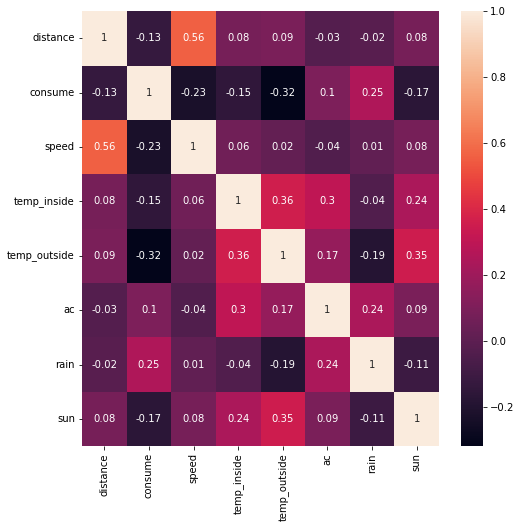

In [25]:
fig, ax = plt.subplots(figsize=(8,8)) #First we have to use plt.subplots to create plot environment.
ax=sns.heatmap(round(numericals_df.corr(),2), annot=True)
plt.show()

## X,y Split

## Train - test split

In [26]:
def split_df(data, split=True):
    
    if split:
        X = data.drop(columns = ['consume'])
        y = data['consume']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
        X_train_num = X_train.select_dtypes(np.number) 
        X_train_cat = X_train.select_dtypes(object)
        X_test_num = X_test.select_dtypes(np.number)
        X_test_cat  = X_test.select_dtypes(object)
        y_train = y_train.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
        return X_train_num, X_train_cat, X_test_num, X_test_cat, y_train, y_test
    else:
        X_train_num = data.select_dtypes(np.number) 
        X_train_cat = data.select_dtypes(object)
        return X_train_num, X_train_cat
        

In [27]:
X_train_num, X_train_cat, X_test_num, X_test_cat, y_train, y_test = split_df(data)

In [28]:
# MinMax function to normalize continuous columns 

transformer = StandardScaler().fit(X_train_num)
# # transformer = MinMaxScaler().fit(X_train_num)

X_train_num_scaled = pd.DataFrame(transformer.transform(X_train_num), columns = X_train_num.columns)
X_test_num_scaled = pd.DataFrame(transformer.transform(X_test_num), columns = X_test_num.columns)

In [29]:
def cat_encode(data, _onehotencoder):

    encoded = _onehotencoder.transform(data).toarray()
    cols = _onehotencoder.get_feature_names_out(input_features=data.columns)
    
    # Returning a complete encoded categorical dataset
    return pd.DataFrame(encoded, columns=cols).reset_index(drop=True)

onehotencoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(X_train_cat)

X_train_cat_encoded = cat_encode(X_train_cat, onehotencoder).reset_index(drop = True)
X_test_cat_encoded = cat_encode(X_test_cat, onehotencoder).reset_index(drop = True)

In [30]:
X_train = pd.concat([X_train_num_scaled,X_train_cat_encoded], axis=1)
X_test = pd.concat([X_test_num_scaled,X_test_cat_encoded], axis=1)

In [31]:

models = [LinearRegression(),SGDRegressor(), DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor()]



In [32]:
def models_automation(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")
    return

In [33]:
models = [LinearRegression(),SGDRegressor(), DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor()]

models_automation(models, X_train,y_train,X_test,y_test)

LinearRegression: Train -> 0.20792454595580234, Test -> 0.15298510141893018
SGDRegressor: Train -> 0.19847296220285193, Test -> 0.12314405760358416
DecisionTreeRegressor: Train -> 0.9982733351078427, Test -> -0.022558211188872912
KNeighborsRegressor: Train -> 0.4641585187332673, Test -> 0.09363934626050052
RandomForestRegressor: Train -> 0.9468887996334633, Test -> 0.29972869424289184


## Hypothesis Testing

In [34]:
data_sp98=data[data['gas_type']=='SP98']
display(data_sp98.head())
data_e10=data[data['gas_type']=='E10']
display(data.head())

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
44,5.4,3.3,32,21.5,7,SP98,0,0,0
45,2.0,9.9,21,21.5,4,SP98,0,0,0
46,14.2,5.1,32,21.5,7,SP98,0,0,0
47,16.0,4.9,25,21.5,8,SP98,0,0,0
48,11.8,4.9,25,21.5,11,SP98,0,0,0


,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [35]:
data_e10.consume.mean()

4.931250000000001

In [36]:
from scipy.stats import ttest_1samp

stat, pval = ttest_1samp(data_sp98['consume'],4.931250000000001)

In [37]:
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)

stat is   -0.4337504908778175
pvalue for the two-tailed test is  0.6648815703845685


In [38]:
# p value is NOT low. In this case, we fail to reject Ho. There is not enough evidence 
# suggesting that average consumption significantly varies between gas type!

## Conclusion


- After cleaning and analysing the data, I concluded that the data does not shows a significant difference between SP98 and E10 when talking about consumtion. I would need further analysis to get more insigths, or focusing better on an idea instead of trying to check all at the same time.


